<a href="https://colab.research.google.com/github/mohammadsanatabassum/labs-and-projects-on-aiml-/blob/main/AIML_MODULE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting features from data

In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=cad42dd36f2e7b25f3a1b67576eaa9cc91759df5d90d612544b2df885daafbbe
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


Part 1: Features of text


In [3]:
topic1 = 'Girafee'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

In [4]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

In [5]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [6]:
print(eng2)

Elephants are the largest living land animals. Three living species are currently recognised: the African bush elephant (Loxodonta africana), the African forest elephant (L. cyclotis), and the Asian elephant (Elephas maximus). They are the only surviving members of the family Elephantidae and the order Proboscidea; extinct relatives include mammoths and mastodons. Distinctive features of elephants include a long proboscis called a trunk, tusks, large ear flaps, pillar-like legs, and tough but sensitive grey skin. The trunk is prehensile, bringing food and water to the mouth and grasping objects. Tusks, which are derived from the incisor teeth, serve both as weapons and as tools for moving objects and digging. The large ear flaps assist in maintaining a constant body temperature as well as in communication. African elephants have larger ears and concave backs, whereas Asian elephants have smaller ears and convex or level backs.
Elephants are scattered throughout sub-Saharan Africa, Sout

In [7]:
print(eng1)


The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes have been thought of as one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into four extant species due to new research into their mitochondrial and nuclear DNA, and individual species can be distinguished by their fur coat patterns. Seven other extinct species of Giraffa are known from the fossil record.
The giraffe's distinguishing characteristics are its extremely long neck and legs, horn-like ossicones, and spotted coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits, and flowe

In [8]:
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages.

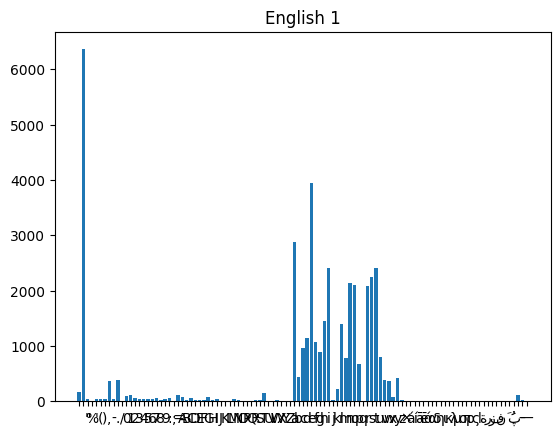

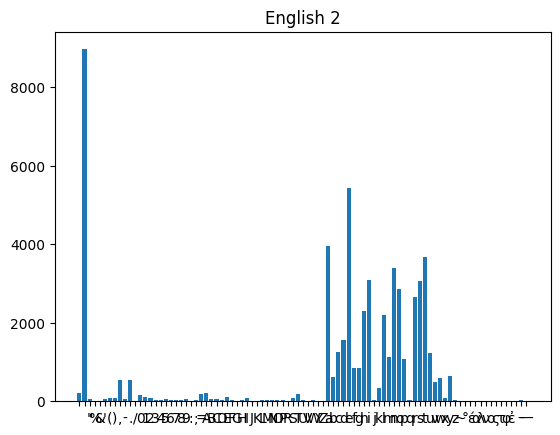

In [9]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

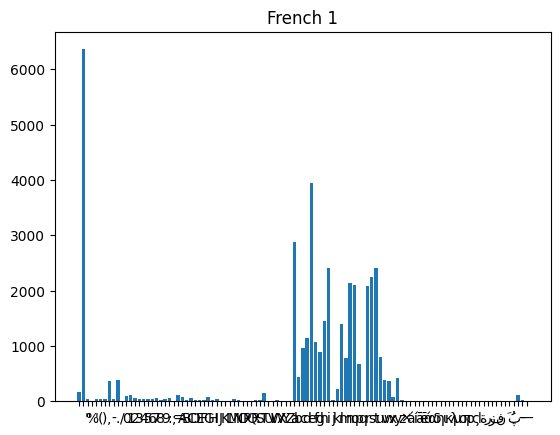

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


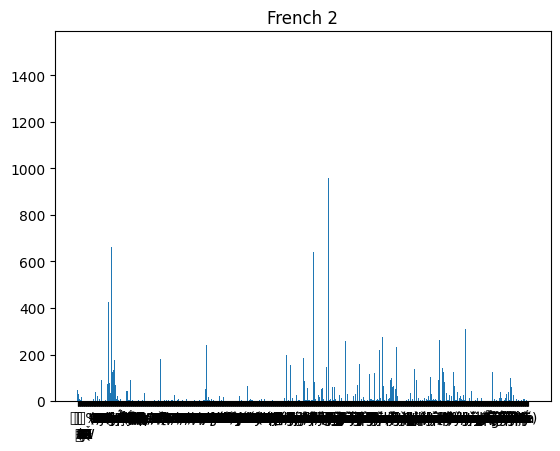

In [11]:
unigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()

unigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

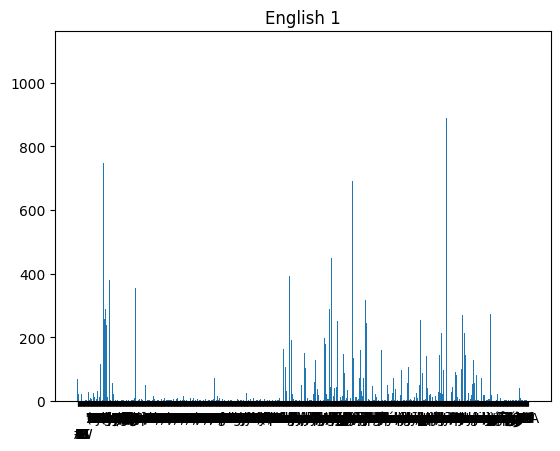

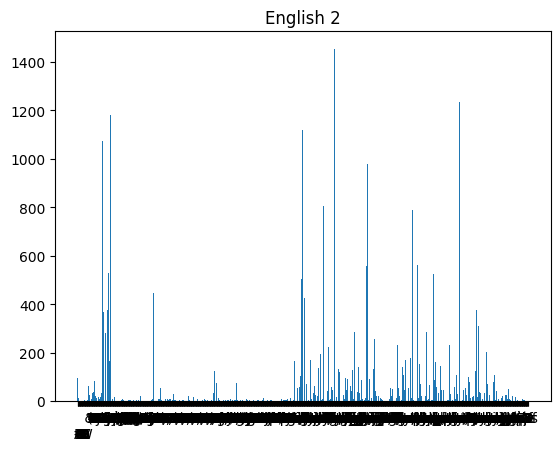

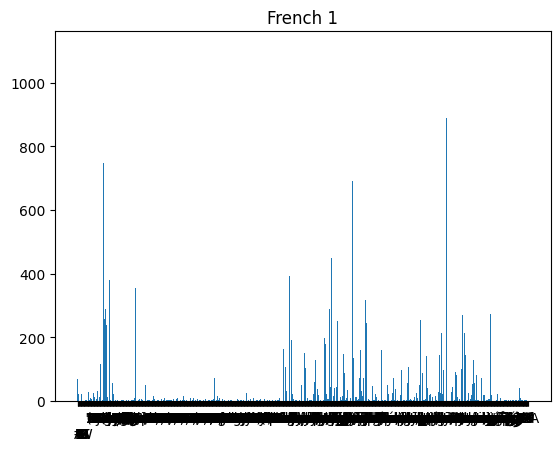

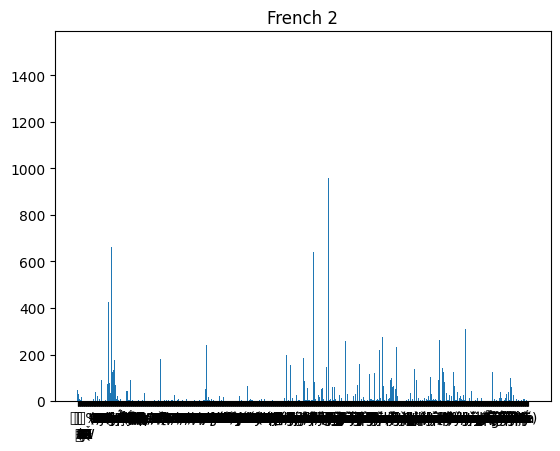

In [12]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [14]:
def plotbihistogram(ngram):
  freq = np.zeros((33,33))
  for ii in range(33):
    for jj in range(33):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

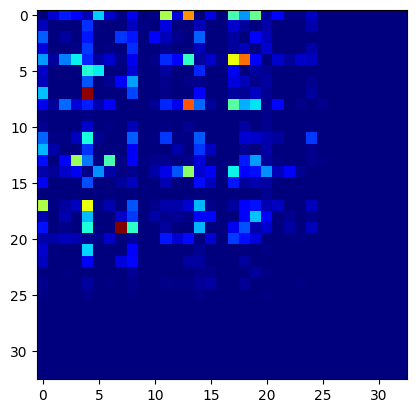

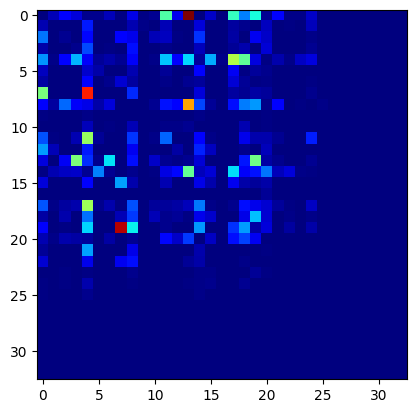

In [15]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

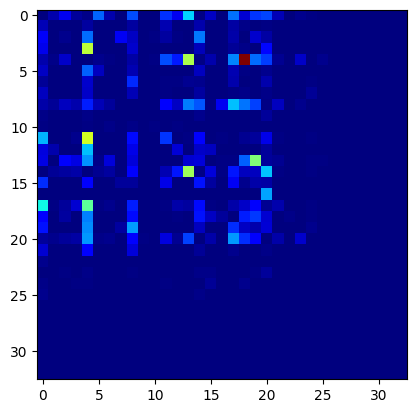

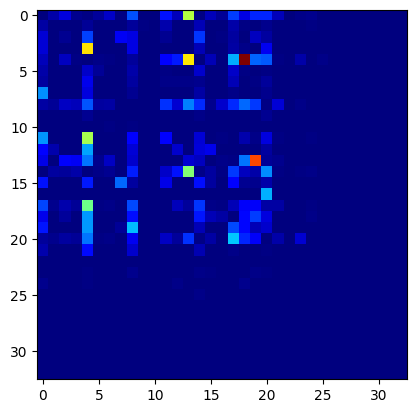

In [16]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 8 ngrams for each text.

In [17]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/33)
  j = int(ind%33)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=8):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [18]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 704.0
('h', 'e') : 692.0
('i', 'n') : 577.0
('e', 's') : 556.0
('a', 'n') : 530.0
('e', 'r') : 450.0
('r', 'e') : 446.0
('r', 'a') : 396.0

English 2:
('a', 'n') : 1119.0
('t', 'h') : 1063.0
('h', 'e') : 980.0
('i', 'n') : 826.0
('e', 'r') : 633.0
('r', 'e') : 604.0
('l', 'e') : 598.0
('n', 'd') : 561.0

French 1:
('e', 's') : 676.0
('l', 'e') : 411.0
('d', 'e') : 393.0
('e', 'n') : 375.0
('o', 'n') : 367.0
('n', 't') : 343.0
('r', 'e') : 314.0
('r', 'a') : 249.0

French 2:
('e', 's') : 957.0
('n', 't') : 797.0
('d', 'e') : 640.0
('e', 'n') : 632.0
('a', 'n') : 545.0
('l', 'e') : 528.0
('o', 'n') : 488.0
('r', 'e') : 461.0


Part 2: Written numbers

In [19]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
no1 = train_X[train_y==0,:,:]
no0 = train_X[train_y==1,:,:]

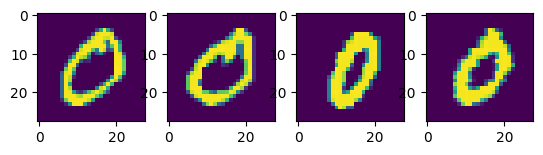

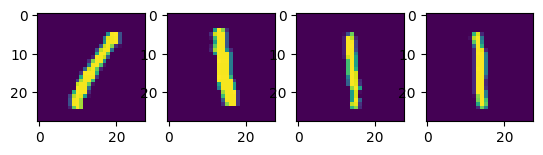

In [21]:
for ii in range(4):
  plt.subplot(1, 4, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(4):
  plt.subplot(1, 4, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [22]:
sum1 = np.sum(no1>0, (1,2))
sum0 = np.sum(no0>0, (1,2))

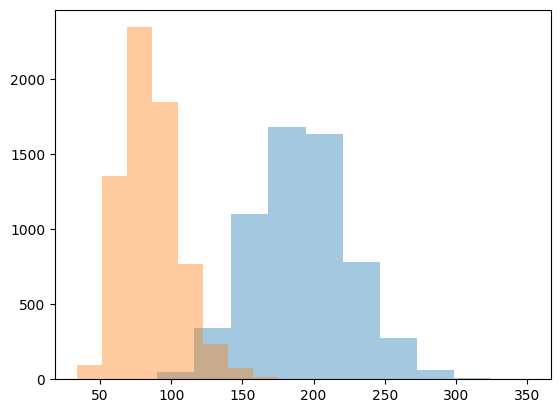

In [23]:
plt.hist(sum1, alpha=0.4);
plt.hist(sum0, alpha=0.4);

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [24]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  hole = hull & ~ (img>0)
  return hole

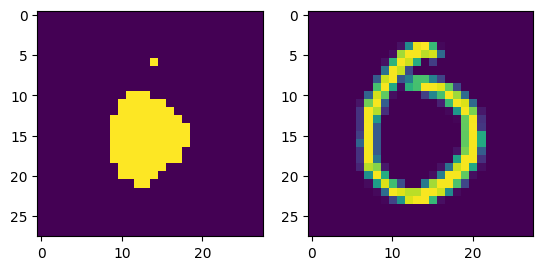

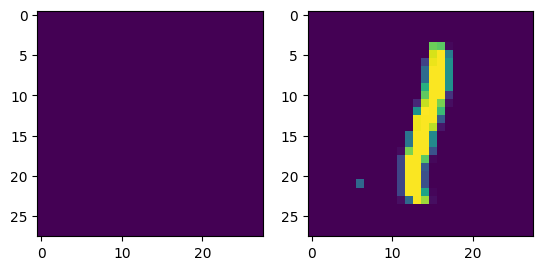

In [25]:
imgs = [no1[236,:,:],  no0[236,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

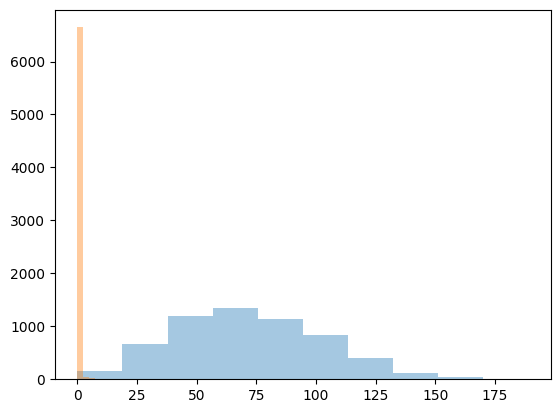

In [26]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.4);
plt.hist(hole0, alpha=0.4);



This feature works even better to distinguish between one and zero.

Now let us try the number of pixels in the 'hull' or the number with the holes filled in:


In [27]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  return hull

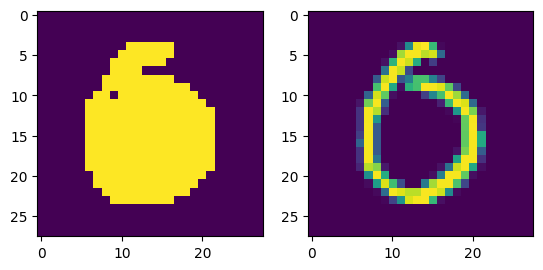

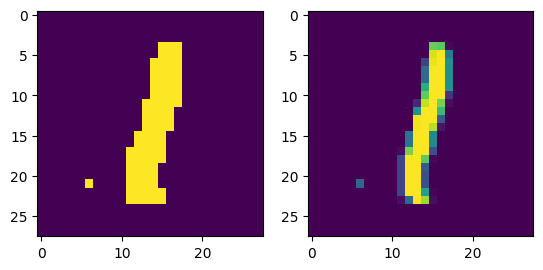

In [28]:
imgs = [no1[236,:,:],  no0[236,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

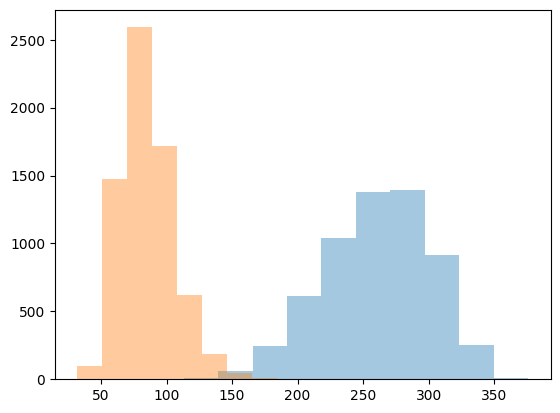

In [29]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.4);
plt.hist(hull0, alpha=0.4);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary


What will happen if we plot two features together?

NameError: name 'getBoundaryPixels' is not defined

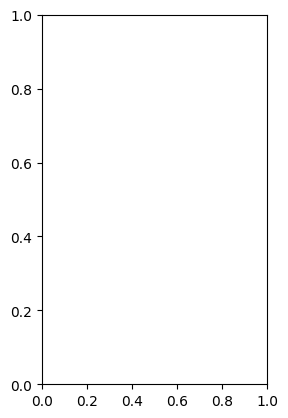

In [31]:
imgs = [no1[236,:,:],  no0[236,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.4);
plt.hist(bound0, alpha=0.4);


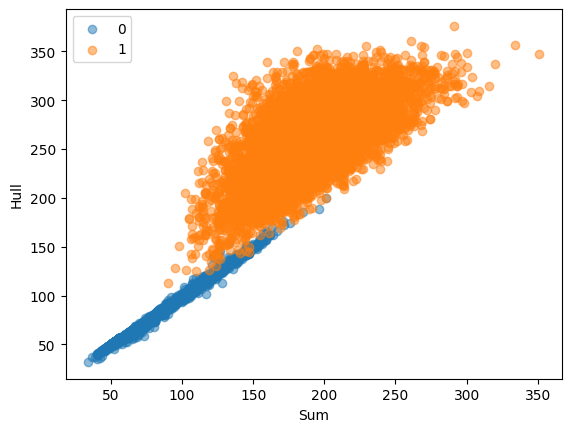

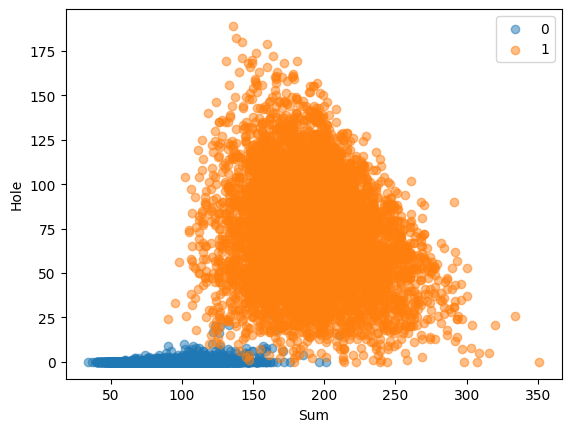

NameError: name 'bound0' is not defined

In [34]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.5)
plt.scatter(sum1, hull1, alpha=0.5)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.5)
plt.scatter(sum1, hole1, alpha=0.5)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.5)
plt.scatter(bound1, hole1, alpha=0.5)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()